In [1]:
""" 
@author: zym

"""
import pandas as pd
from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import AutoregressionAD

In [2]:
# 输出找到的异常点是什么

def show_anomalies(anomalies):
    
    result = []
    for i in range(len(anomalies)):
        if(anomalies[i]==True):
            result.append(anomalies.index[i])
    
    return result

In [3]:
def autoregression_detect(s,n_steps0, step_size0, c0,real_anomalies):
    
    autoregression_ad = AutoregressionAD(n_steps=n_steps0, step_size=step_size0, c=c0)
    anomalies_autoregression_ad = autoregression_ad.fit_detect(s)
    print(show_anomalies(anomalies_autoregression_ad))
    # 画出预测的异常点
    plot(s, anomaly=anomalies_autoregression_ad, ts_markersize=1, anomaly_color='red', anomaly_tag="marker", anomaly_markersize=5)
    # 画出真实的异常点
    s_anomalies=anomalies_autoregression_ad[:]
    for i in range(len(s_anomalies)):
        s_anomalies[i]=False
    s_anomalies[real_anomalies]=True
    plot(s, anomaly=s_anomalies, ts_linewidth=1, ts_markersize=3,anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker")

[Timestamp('2014-02-20 03:35:00', freq='5T'), Timestamp('2014-02-21 03:25:00', freq='5T'), Timestamp('2014-02-26 22:05:00', freq='5T'), Timestamp('2014-02-28 03:20:00', freq='5T')]


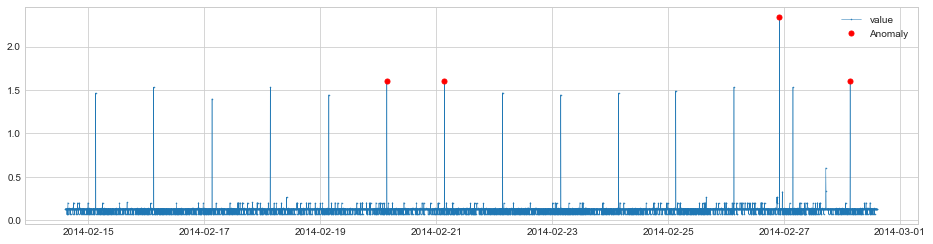

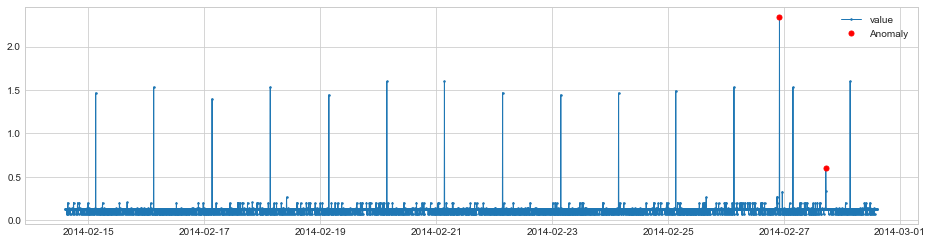

In [6]:
### cpu
s = pd.read_csv("data/ec2_cpu_utilization_24ae8d.csv",index_col="timestamp",parse_dates=True, squeeze=True)  
s = validate_series(s)
real_anomalies = ['2014-02-26 22:05:00','2014-02-27 17:15:00']
autoregression_detect(s,2*2,12,27,real_anomalies)

[Timestamp('2011-07-16 09:15:01'), Timestamp('2011-07-16 14:15:01'), Timestamp('2011-07-22 12:15:01'), Timestamp('2011-07-22 16:15:01'), Timestamp('2011-08-23 08:15:01'), Timestamp('2011-08-28 13:15:01'), Timestamp('2011-09-04 09:15:01')]


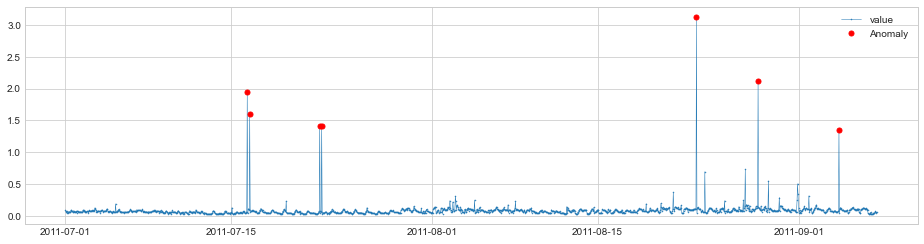

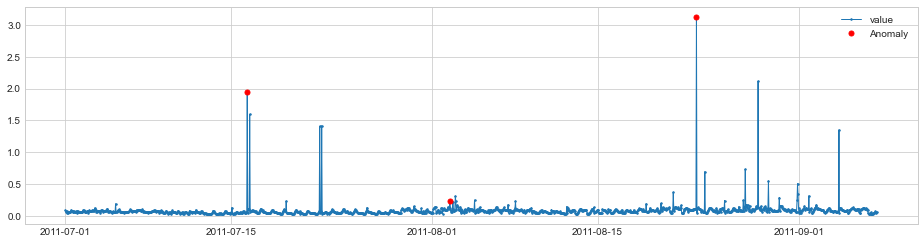

In [7]:
### cpc
s = pd.read_csv("data/exchange-4_cpc_results.csv",index_col="timestamp",parse_dates=True, squeeze=True)  
s = validate_series(s)
real_anomalies = ['2011-07-16 09:15:01','2011-08-02 12:15:01','2011-08-23 08:15:01']
autoregression_detect(s,2*2,12,30,real_anomalies)

[Timestamp('2015-09-16 08:09:00'), Timestamp('2015-09-16 08:19:00'), Timestamp('2015-09-17 07:55:00')]


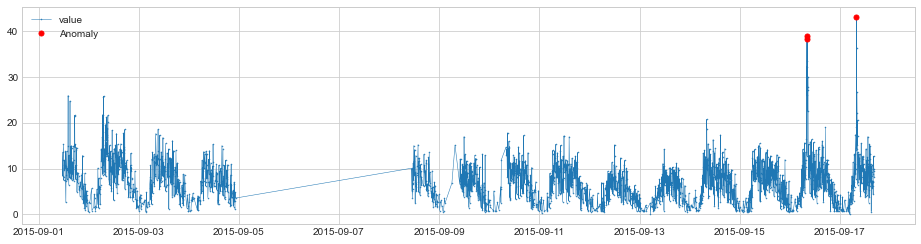

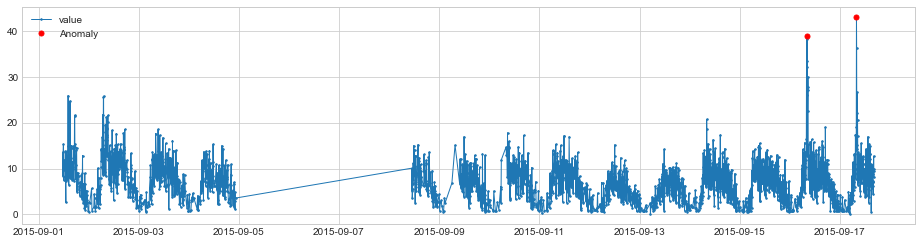

In [8]:
### occupancy
s = pd.read_csv("data/occupancy_t4013.csv",index_col="timestamp",parse_dates=True, squeeze=True)  
s = validate_series(s)
real_anomalies = ['2015-09-16 08:09:00','2015-09-17 07:55:00']
autoregression_detect(s,2*2,50,8,real_anomalies)

[Timestamp('2015-08-18 16:26:00'), Timestamp('2015-09-10 23:13:00'), Timestamp('2015-09-10 23:18:00'), Timestamp('2015-09-11 00:13:00'), Timestamp('2015-09-11 00:25:00')]


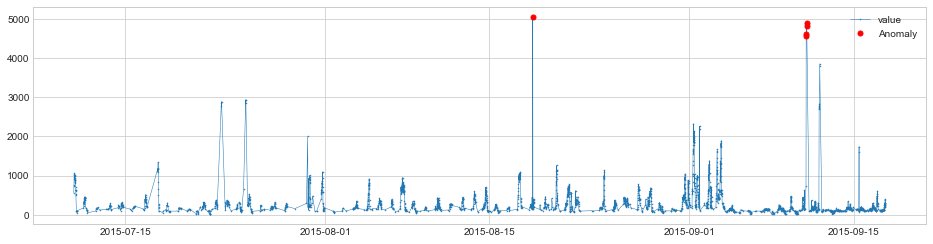

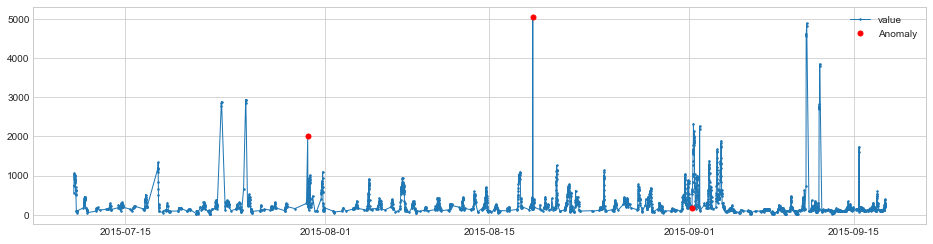

In [9]:
### travel
s = pd.read_csv("data/TravelTime_387.csv",index_col="timestamp",parse_dates=True, squeeze=True)  
s = validate_series(s)
real_anomalies = ['2015-07-30 12:29:00','2015-08-18 16:26:00','2015-09-01 05:34:00']
autoregression_detect(s,2*2,12,30,real_anomalies)

[Timestamp('2015-03-05 19:47:53', freq='5T'), Timestamp('2015-03-05 21:02:53', freq='5T'), Timestamp('2015-03-11 20:57:53', freq='5T'), Timestamp('2015-04-06 08:12:53', freq='5T'), Timestamp('2015-04-06 08:17:53', freq='5T')]


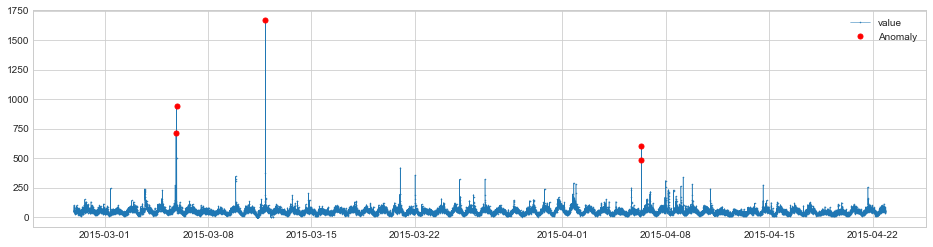

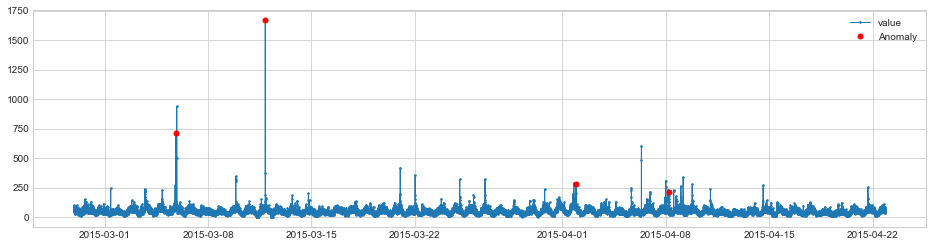

In [11]:
# twitter
s = pd.read_csv("data/Twitter_volume_AMZN.csv",index_col="timestamp",parse_dates=True, squeeze=True)  # Twitter_volume_AMZN
s = validate_series(s)
real_anomalies = ['2015-03-05 19:47:53','2015-03-11 20:57:53','2015-04-01 21:57:53','2015-04-08 04:52:53']
autoregression_detect(s,2*2,10,30,real_anomalies)